In [1]:
# For auto-reloading external modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy
import observations.dimensions.two.sampling as observe
import matplotlib.pyplot as plt
import seaborn as sns

from defaults.plot import *
import matplotlib as mpl

enable_latex_export()

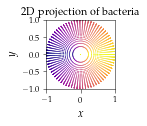

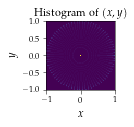

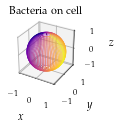

In [97]:
from math import pi, sin, cos, acos
from observations.dimensions.one.sampling import step_sample

samplesize = 75
# based on http://corysimon.github.io/articles/uniformdistn-on-sphere/
# or https://mathworld.wolfram.com/SpherePointPicking.html
# or https://www.bogotobogo.com/Algorithms/uniform_distribution_sphere.php
thetas = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
phis = numpy.array([acos(step_sample(i, -1, 1, samplesize)) for i in range(samplesize + 1)]).reshape(-1, 1)

def numpy_spherical_to_cartesian(arr):
    def helper(arr):
        theta = arr[0]
        phi = arr[1]
        return [sin(phi) * cos(theta), sin(phi) * sin(theta), cos(phi)]

    return numpy.apply_along_axis(helper, 1, arr)

spherical_points = numpy.array(numpy.meshgrid(thetas, phis)).T.reshape(-1, 2)
cartesian_points = numpy_spherical_to_cartesian(spherical_points)
colors = numpy.abs(spherical_points[:, 0] - pi)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.scatter(cartesian_points[:,0], cartesian_points[:,1], s=0.6, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2D projection of bacteria")
plt.savefig("figures/bacteria/cell2d.pdf", dpi=dpi, bbox_inches='tight')
plt.show()


# TODO: this figure was created with 500 sample points, bins = 70
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Histogram of $\left(x,y\right)$")
plt.hist2d(cartesian_points[:,0], cartesian_points[:,1], bins=63, rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("figures/bacteria/density.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

delta = 2 * pi / 10
for i in range(1):
    new_theta = (thetas + i * delta) % (2 * pi)
    spherical_points = numpy.array(numpy.meshgrid(new_theta, phis)).T.reshape(-1, 2)
    cartesian_points = numpy_spherical_to_cartesian(spherical_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=0.6, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    plt.title("Bacteria on cell", y=1.05)
    plt.savefig("figures/bacteria/cell.pdf", dpi=dpi, bbox_inches='tight')
    plt.show()

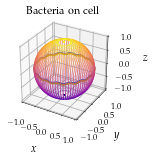

[[0.22939534 0.         0.20333546 0.01707456 0.21478813 0.03632869]
 [0.20333546 0.01707456 0.21478813 0.03632869 0.24151099 0.06200948]
 [0.21478813 0.03632869 0.24151099 0.06200948 0.2361096  0.08222206]
 ...
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
5624
[[ 0.22939534  0.         -0.97333333 ...  0.21478813  0.03632869
  -0.97598478]
 [ 0.20333546  0.01707456 -0.97896024 ...  0.24151099  0.06200948
  -0.96841482]
 [ 0.21478813  0.03632869 -0.97598478 ...  0.2361096   0.08222206
  -0.9682416 ]
 ...
 [ 0.          0.         -1.         ...  0.          0.
  -1.        ]
 [ 0.          0.         -1.         ...  0.          0.
  -1.        ]
 [ 0.          0.         -1.         ...  0.          0.
  -1.        ]]
5624


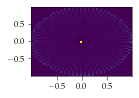

In [98]:
samplesize = 75
steps = 75
delta = 2 * pi / steps
rotations = 8

phis = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(1, samplesize)]).reshape(-1, 1)
thetas = numpy.zeros(phis.shape)

fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
plt.title("Bacteria on cell", y=1.05)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))

spherical_points = numpy.append(thetas, phis, axis=1)
cartesian_points = numpy_spherical_to_cartesian(spherical_points)
colors = numpy.abs(spherical_points[:, 1] - pi)

ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=0.5, edgecolor='none', c=colors, cmap='plasma', rasterized=True)

positions = cartesian_points.reshape(-1, 1, 3)

cmap = mpl.cm.get_cmap('plasma')

for i in range(1, steps + 1):
    thetas = (thetas + delta) % (2 * pi)
    spherical_points = numpy.append(thetas, phis + sin(rotations * 2 * i * delta) * 2 / samplesize, axis=1)
    cartesian_points = numpy_spherical_to_cartesian(spherical_points)

    positions = numpy.append(positions, cartesian_points.reshape(-1, 1, 3), axis=1)
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=1, edgecolor='none', c=colors, cmap='plasma', rasterized=True)
    ax.scatter([0], [0], [1], s=1, edgecolor='none', color=cmap(pi), rasterized=True)
    ax.scatter([0], [0], [-1], s=1, edgecolor='none', color=cmap(0), rasterized=True)

positions = numpy.append(positions, numpy.repeat([0, 0, 1], steps + 1).reshape((1, -1, 3), order='F'), axis=0)
positions = numpy.append(positions, numpy.repeat([0, 0, -1], steps + 1).reshape((1, -1, 3), order='F'), axis=0)

point = positions[int(len(positions) / 2) + 1]
ax.plot(point[:,0], point[:,1], point[:,2])
point = positions[int(len(positions) / 2)]
ax.plot(point[:,0], point[:,1], point[:,2])
point = positions[int(len(positions) / 2) - 1]
ax.plot(point[:,0], point[:,1], point[:,2])

plt.savefig("figures/bacteria/cell.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

from observations.utils import lags

positions_2d = numpy.delete(positions, 2, 2)

# take from every position the next two subsequent positions and create (x1, y1, x2, y2, x3, y3)
measurements = numpy.array([numpy.array(list(zip(*lags(p, 2)))).reshape(-1, 6) for p in positions_2d]).reshape(-1, 6)
measurements_full = numpy.array([numpy.array(list(zip(*lags(p, 2)))).reshape(-1, 9) for p in positions]).reshape(-1, 9)
print(measurements)
print(len(measurements))
print(measurements_full)
print(len(measurements_full))

plt.hist2d(measurements[:,0], measurements[:,1], bins=50, rasterized=True)
plt.show()

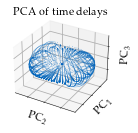

In [75]:
from sklearn.preprocessing import StandardScaler
measurements_scaler = StandardScaler()
measurements_scaled = measurements_scaler.fit_transform(measurements)

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full')

#%TODO: standardize measurmenets before?
data = pca.fit_transform(measurements_scaled)#[2:]
measurements = measurements#[2:]

pca_scaler = StandardScaler()
measurements_fit = pca_scaler.fit_transform(data)

# todo color based on theta

fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
#ax.set_box_aspect((numpy.ptp(measurements_fit[:,0]), numpy.ptp(measurements_fit[:,1]), numpy.ptp(measurements_fit[:,2])))
ax.scatter(measurements_fit[:,0], measurements_fit[:,1], measurements_fit[:,2], s=0.5, cmap='cividis', edgecolor='none', rasterized=True)

plt.title("PCA of time delays", y=1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlabel("PC$_2$", labelpad=-10)
ax.set_ylabel("PC$_1$", labelpad=-10)
ax.set_zlabel("PC$_3$", labelpad=-10)

plt.savefig("figures/bacteria/pca.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

In [76]:
%%time

import datafold.pcfold as pfold

X_pcm = pfold.PCManifold(measurements_fit)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.153532356459583, cut-off=1.6817165403862422
Wall time: 171 ms


In [77]:
%%time

import datafold.dynfold as dfold

num_eigenpairs = 20

# TODO: also show this plot
#dmap = dfold.DiffusionMaps(
#    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
#    n_eigenpairs=num_eigenpairs,
#    dist_kwargs=dict(cut_off=X_pcm.cut_off),
#)

dmap = dfold.DiffusionMaps(
    kernel=pfold.ContinuousNNKernel(k_neighbor=1000, delta=1.0),
    n_eigenpairs=num_eigenpairs
)

dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

from datafold.dynfold import LocalRegressionSelection

selection = LocalRegressionSelection(
    intrinsic_dim=3, n_subsample=3000, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 2 3]
Wall time: 4min 42s


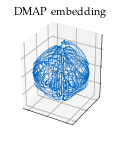

In [78]:
target_mapping = selection.transform(dmap.eigenvectors_)

fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((numpy.ptp(target_mapping[:,0]), numpy.ptp(target_mapping[:,1]), numpy.ptp(target_mapping[:,2])))
ax.scatter(target_mapping[:,0], target_mapping[:,1], target_mapping[:,2], s=0.8, edgecolor='none', rasterized=True)
plt.title("DMAP embedding")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.savefig("figures/bacteria/dmap.pdf", dpi=dpi, bbox_inches="tight")
plt.show()

In [79]:
%%time
import torch
import flows.utils as flows

flow_dist, spline_transform = flows.normalnd_to_samples(torch.tensor(target_mapping, dtype=torch.float), dim=3, steps=2001, normalize=True)
flow_samples = flow_dist.sample(torch.Size([10000])).detach().numpy()

C:\Users\plain\Dropbox\university\21SS\IN2261 Bachelor's Thesis\code\demos\flows\utils.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.tensor(data, dtype=torch.float)
Training NF: 100%|██████████| 2001/2001 [01:15<00:00, 26.60it/s, loss=-9.78]

Wall time: 1min 15s


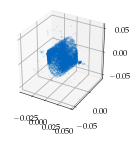

In [80]:
fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((numpy.ptp(flow_samples[:,0]), numpy.ptp(flow_samples[:,1]), numpy.ptp(flow_samples[:,2])))
ax.scatter(flow_samples[:,0], flow_samples[:,1], flow_samples[:,2], s=0.01, cmap='cividis', rasterized=True)
#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-1.5, 1.5)
#ax.set_zlim(-4, 4)
plt.show()

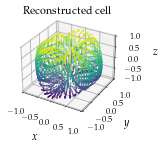

In [100]:
# Way 1

from scipy.stats import norm
uniform_space = norm.cdf(spline_transform.inv(torch.tensor(target_mapping, dtype=torch.float)).detach().numpy())
uniform_space = 2 * uniform_space - 1 # we transport to [-1, 1] not to [0,1]

fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(measurements[:,0], measurements[:,1], uniform_space[:,2], s=2, edgecolor='none', c=uniform_space[:,2], rasterized=True)
plt.title("Reconstructed cell", y=1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
plt.savefig("figures/bacteria/cell-reconstructed2.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

Now we will present geomtric harmonics way, but this time with a sphere where the movement is linear (no sine wave)
This was optimized, but my advisor Felix Dietrich suggested that Takens theorem has issues with perfectly symmetrical data
There was no time left to make it work with the sine movement

In [ ]:
delta = 2 * pi / 10
thetas0 = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
thetas1 = (thetas0 + delta) % (2 * pi)
thetas2 = (thetas0 + 2 * delta) % (2 * pi)
#thetas3 = (thetas0 + 3 * delta) % (2 * pi)
#thetas4 = (thetas0 + 4 * delta) % (2 * pi)
phis0 = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)
phis1 = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)
phis2 = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)

cartesian_points0 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas0, phis0)).T.reshape(-1, 2))
cartesian_points1 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas1, phis1)).T.reshape(-1, 2))
cartesian_points2 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas2, phis2)).T.reshape(-1, 2))
#cartesian_points3 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas3, phis)).T.reshape(-1, 2))
#cartesian_points4 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas4, phis)).T.reshape(-1, 2))

measurements = cartesian_points0[:,[0,1]]
measurements = numpy.append(measurements, cartesian_points1[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points2[:,[0,1]], axis=1)
#measurements = numpy.append(measurements, cartesian_points3[:,[0,1]], axis=1)
#measurements = numpy.append(measurements, cartesian_points4[:,[0,1]], axis=1)

print(measurements)

In [ ]:
X_pcm = pfold.PCManifold(measurements_fit)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

%%time

import datafold.dynfold as dfold

num_eigenpairs = 20

# TODO: also show this plot
#dmap = dfold.DiffusionMaps(
#    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
#    n_eigenpairs=num_eigenpairs,
#    dist_kwargs=dict(cut_off=X_pcm.cut_off),
#)

dmap = dfold.DiffusionMaps(
    kernel=pfold.ContinuousNNKernel(k_neighbor=1000, delta=1.0),
    n_eigenpairs=num_eigenpairs
)

dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

from datafold.dynfold import LocalRegressionSelection

selection = LocalRegressionSelection(
    intrinsic_dim=3, n_subsample=3000, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

In [ ]:
target_mapping = selection.transform(dmap.eigenvectors_)

fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((numpy.ptp(target_mapping[:,0]), numpy.ptp(target_mapping[:,1]), numpy.ptp(target_mapping[:,2])))
ax.scatter(target_mapping[:,0], target_mapping[:,1], target_mapping[:,2], s=0.8, edgecolor='none', rasterized=True)
plt.title("DMAP embedding")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
%%time
import torch
import flows.utils as flows

flow_dist, spline_transform = flows.normalnd_to_samples(torch.tensor(target_mapping, dtype=torch.float), dim=3, steps=2001, normalize=True)
flow_samples = flow_dist.sample(torch.Size([10000])).detach().numpy()

In [ ]:
fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((numpy.ptp(flow_samples[:,0]), numpy.ptp(flow_samples[:,1]), numpy.ptp(flow_samples[:,2])))
ax.scatter(flow_samples[:,0], flow_samples[:,1], flow_samples[:,2], s=0.01, cmap='cividis', rasterized=True)
plt.show()


In [14]:
%%time

from sklearn.model_selection import cross_val_score, train_test_split
from datafold.dynfold import (
    GeometricHarmonicsInterpolator as GHI,
    LocalRegressionSelection,
)

import pandas as pd
# Ok, now we have transformed a uniform distribution to the embedded space
# We can now reconstruct the fold by learning a way back from this embedding into the original space
# (could have been immediately)
random_state = 1337

X_all = measurements_fit
psi_all = target_mapping

# shuffle new training and test set
X_train, X_test, psi_train, psi_test = train_test_split(
    X_all, psi_all, train_size=2 / 3, random_state=random_state
)

# (!!) we use the DMAP space as base space now, and interpolate X as function values
pcm = pfold.PCManifold(psi_train)
pcm.optimize_parameters(random_state=random_state)

opt_epsilon = pcm.kernel.epsilon
opt_cutoff = pcm.cut_off
opt_n_eigenpairs = 500

# test the interpolation quality with PCManifold optimization
gh_interpolant_psi_to_X = GHI(
    #pfold.ContinuousNNKernel(k_neighbor=125, delta=1.0),
    pfold.GaussianKernel(epsilon=opt_epsilon),
    n_eigenpairs=opt_n_eigenpairs,
    dist_kwargs=dict(cut_off=opt_cutoff),
)

gh_interpolant_psi_to_X.fit(psi_train, X_train)

# compute residual and error
residual = gh_interpolant_psi_to_X.score(psi_train, X_train)
error = gh_interpolant_psi_to_X.score(psi_test, X_test)

pd.DataFrame(
    numpy.row_stack([residual, error]),
    index=["residual", "error"],
    columns=["a", "b", "c", "d", "e", "f"],
)

Wall time: 9.13 s


,a,b,c,d,e,f
residual,-0.158271,-0.185500,-0.612506,-0.403360,-0.663514,-0.484995
error,-0.250111,-0.283547,-0.803522,-0.519047,-0.809017,-0.615350


In [15]:
%%time

from skopt.searchcv import BayesSearchCV
from skopt.space import Categorical, Integer, Real

n_iters = 30
numpy.random.seed(1337)

train_indices, test_indices = train_test_split(
    numpy.random.permutation(X_train.shape[0]), train_size=2 / 3, test_size=1 / 3
)

class GHIGauss(GHI):
    def __init__(self, epsilon=1, n_eigenpairs=3, cut_off=numpy.inf):

        self.epsilon = epsilon
        self.n_eigenpairs = n_eigenpairs
        self.cut_off = cut_off

        super(GHIGauss, self).__init__(
            kernel=pfold.GaussianKernel(self.epsilon),
            n_eigenpairs=self.n_eigenpairs,
            is_stochastic=False,
            dist_kwargs=dict(cut_off=self.cut_off),
        )

opt = BayesSearchCV(
    GHIGauss(),
    {
        "epsilon": Real(
            pcm.kernel.epsilon / 2, pcm.kernel.epsilon * 2, prior="log-uniform"
        ),
        "cut_off": Real(pcm.cut_off / 2, pcm.cut_off * 2, prior="uniform"),
        "n_eigenpairs": Integer(50, 500, prior="uniform"),
    },
    n_iter=n_iters,
    random_state=0,
    scoring=lambda estimator, x, y: estimator.score(
        x, y, multioutput="uniform_average"
    ),  # is to be maximized
    cv=[[train_indices, test_indices]],
    refit=False,  # we cannot refit to the entire dataset because this would alter the optimal kernel scale
)

# run the Bayesian optimization
opt.fit(psi_train, X_train)

# get best model and results from parameter search

# refit best parameter set on training set (not entire dataset - the parameters are optimized for the training set!)
optimal_GHI = GHIGauss(**opt.best_params_).fit(
    psi_train[train_indices, :], X_train[train_indices, :]
)

# latest: Optimal epsilon: 1.3021526155243075e-05, cut-off: 0.027207018384578004, #eigenpairs: 204
#new vals Optimal epsilon: 2.118274463601169e-06, cut-off: 0.012925746502511857, #eigenpairs: 145
#new Optimal epsilon: 4.315848295598651e-06, cut-off: 0.003152397175019229, #eigenpairs: 59
#new Optimal epsilon: 7.153057073922761e-07, cut-off: 0.006376698030830363, #eigenpairs: 204
#optimal_GHI = GHIGauss(epsilon=1.839958025058121e-05, n_eigenpairs=500, cut_off=0.02098847160879999).fit(
#    psi_train[train_indices, :], X_train[train_indices, :]
#)


print(
    f"Previous epsilon: {pcm.kernel.epsilon}, cut-off: {pcm.cut_off}, #eigenpairs: {num_eigenpairs}"
)
print(
    f"Optimal epsilon: {optimal_GHI.epsilon}, cut-off: {optimal_GHI.cut_off}, #eigenpairs: {optimal_GHI.n_eigenpairs}"
)

Previous epsilon: 3.6896275016118012e-06, cut-off: 0.008244116100061764, #eigenpairs: 20
Optimal epsilon: 5.617722353302447e-06, cut-off: 0.010190046383569124, #eigenpairs: 69
Wall time: 5min 9s


[[-0.02819861 -0.02774193 -0.94117647 -0.94117647 -0.94117647]
 [-0.03755422 -0.04268705 -0.94117647 -0.94117647 -0.88235294]
 [-0.07137623 -0.09589237 -0.94117647 -0.94117647 -0.82352941]
 ...
 [ 0.39593725  0.774434    0.94117647  0.94117647  0.82352941]
 [ 0.4169278   0.78299644  0.94117647  0.94117647  0.88235294]
 [ 0.40999803  0.71233361  0.94117647  0.94117647  0.94117647]]


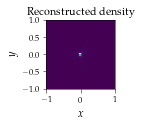

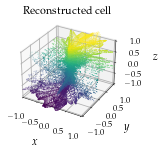

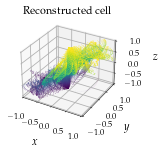

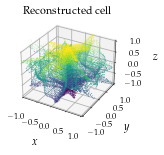

Wall time: 3.38 s


In [16]:
%%time

from scipy.special import erfinv
Gauss = lambda x, mu, sigma: mu + numpy.sqrt(2)*sigma*erfinv(2*x-1)
standard_gauss = numpy.vectorize(lambda x: Gauss((x + 1) / 2, 0, 1)) # multiple with 2 subtract one to transport -1 - 1 to -1, 1

def get_normal_points():
    x = numpy.linspace(-1, 1, 35)[1:-1]
    y = numpy.linspace(-1, 1, 35)[1:-1]
    z = numpy.linspace(-1, 1, 35)[1:-1]

    x_mesh, y_mesh, z_mesh = numpy.meshgrid(x, y, z)

    x_normal, y_normal, z_normal = numpy.meshgrid(standard_gauss(x), standard_gauss(y), standard_gauss(z))

    point_tuples = numpy.array((x_mesh, y_mesh, z_mesh)).reshape(3, -1).T
    return point_tuples, numpy.array((x_normal, y_normal, z_normal)).reshape(3, -1).T

point_tuples, normal_tuples = get_normal_points()

reconstructed_space = spline_transform(torch.tensor(normal_tuples, dtype=torch.float)).detach().numpy()
#scaled_pca_space = gh_interpolant_psi_to_X.predict(reconstructed_space)
scaled_pca_space = optimal_GHI.predict(reconstructed_space)

reconstructed_original_scaled = pca.inverse_transform(pca_scaler.inverse_transform(scaled_pca_space))
reconstructed_original = measurements_scaler.inverse_transform(reconstructed_original_scaled)[:,[0,1]]

expanded_original = numpy.append(reconstructed_original, point_tuples[:,[0,1,2]], axis=1)

print(expanded_original)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Reconstructed density")
plt.hist2d(expanded_original[:,0], expanded_original[:,1], bins=50, rasterized=True, range=numpy.array([(-1, 1), (-1, 1)]))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("figures/bacteria/density-reconstructed.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

for i in range(2,5):
    fig = plt.figure(figsize=(2.8, 2.8 * 0.7))
    ax = fig.add_subplot(111, projection='3d')
    #ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], alpha=0.05, s=1, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
    ax.scatter(expanded_original[:,0], expanded_original[:,1], expanded_original[:,i], s=0.5, c=expanded_original[:,i], edgecolor='none', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    #ax.azim = -35
    plt.title("Reconstructed cell", y=1.05)
    plt.savefig("figures/bacteria/cell-reconstructed.pdf", dpi=dpi, bbox_inches='tight')
    plt.show()